In [1]:
import tensorflow as tf
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
x_train = mnist.train.images
y_label = mnist.train.labels

In [4]:
y_label.shape

(55000, 10)

In [63]:

X = tf.placeholder(tf.float32, shape=[None,784])
Y = tf.placeholder(tf.float32, shape=[None,10])

W1 = tf.Variable(tf.random_normal([784,500]))
B1 = tf.Variable(tf.random_normal([500]))

layer1 = tf.nn.relu(tf.matmul(X,W1)+B1)

W2 = tf.Variable(tf.random_normal([500,200]))
B2 = tf.Variable(tf.random_normal([200]))

layer4 = tf.nn.relu(tf.matmul(layer1, W2)+B2)

W5 = tf.Variable(tf.random_normal([200,10]))
B5 = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(layer4, W5)+B5
hypothesis = tf.nn.softmax(logits)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
# cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [64]:
training_epoch = 15
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epoch):
    avg_cost=0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c,_ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y:batch_ys})
        avg_cost += c/total_batch
    print("Epoch :", epoch , "avg_cost : ",avg_cost)
    


Epoch : 0 avg_cost :  54.61776920795435
Epoch : 1 avg_cost :  7.66703055070204
Epoch : 2 avg_cost :  3.3658392236366037
Epoch : 3 avg_cost :  1.9275385335170077
Epoch : 4 avg_cost :  1.427601417330801
Epoch : 5 avg_cost :  1.1032230859167944
Epoch : 6 avg_cost :  0.7234266357208902
Epoch : 7 avg_cost :  0.6241781953516915
Epoch : 8 avg_cost :  0.5309217664322137
Epoch : 9 avg_cost :  0.512367027288684
Epoch : 10 avg_cost :  0.31490547869100477
Epoch : 11 avg_cost :  0.26234342238611796
Epoch : 12 avg_cost :  0.2629326827129856
Epoch : 13 avg_cost :  0.27373189728749403
Epoch : 14 avg_cost :  0.29816008311781


In [65]:
x_test = mnist.test.images
y_test = mnist.test.labels

In [66]:
sess.run(accuracy, feed_dict={X:x_test, Y:y_test})

0.9418

In [16]:
import random
import matplotlib.pyplot as plt

label :  [0]
prediction :  [3]


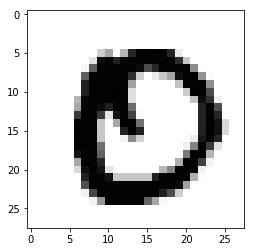

In [40]:
r = random.randint(0, mnist.test.num_examples-1)
print('label : ',sess.run(tf.argmax(mnist.test.labels[[r]],1)))
print('prediction : ',sess.run(tf.argmax(hypothesis,1), feed_dict={X:mnist.test.images[[r]]}))

plt.imshow(
    mnist.test.images[[r]].reshape(28,28),
    cmap='Greys',
    interpolation='nearest')

In [33]:
# 레이어가 deep 할수록 gradientDecent는 비추, adam 추천

In [47]:
#zoo 다시

In [2]:
xy = np.loadtxt('c:/users/student/desktop/zoo.csv', delimiter=',', dtype = np.float32)

In [3]:
x = xy[:,:-1]
y = xy[:,[-1]]
print (x.shape, y.shape)

(101, 16) (101, 1)


In [4]:
X = tf.placeholder(tf.float32, shape = [None, 16])
Y = tf.placeholder(tf.int32, shape = [None, 1])
Y_onehot = tf.one_hot(Y,7)
Y_onehot = tf.reshape(Y_onehot,[-1,7])

In [19]:
W1 = tf.Variable(tf.random_normal([16,12]))
B1 = tf.Variable(tf.random_normal([12]))

layer1 = tf.nn.relu(tf.matmul(X,W1)+B1)

W2 = tf.Variable(tf.random_normal([12,10]))
B2 = tf.Variable(tf.random_normal([10]))

layer4 = tf.nn.relu(tf.matmul(layer1, W2)+B2)

W5 = tf.Variable(tf.random_normal([10,7]))
B5 = tf.Variable(tf.random_normal([7]))

logits = tf.matmul(layer4, W5)+B5
hypothesis = tf.nn.softmax(logits)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_onehot))
# cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.AdamOptimizer(0.003).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [20]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    c,_ = sess.run([cost,optimizer],feed_dict = {X:x, Y:y})
    if step % 100 ==0:
        print(c)
    


46.695713
4.199753
0.9005008
0.449366
0.23942766
0.10521699
0.03455747
0.016409911
0.0103392955
0.0074038776
0.005652605
0.0045187837
0.0037241785
0.0031337522
0.0026486977
0.0022889331
0.0020012055
0.0017356368
0.0015107141
0.0013355133


array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]], dtype=float32)